In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

    1. Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с горизонтом прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" . Учитывать только глубину истории при p=3.
    2. Оцените ошибку модели из п.1 .

In [2]:
# Разбиение DataSet на тренировочный и тестовый
def split_data_b(data, target, split_date, h):
    X_train_ret = data.loc[data.index.get_level_values('Date') <= split_date].drop(columns=target).iloc[:-h,:]
    y_train_ret = data.loc[data.index.get_level_values('Date') <= split_date, target].values[h:]
    X_test_ret = data.loc[data.index.get_level_values('Date') >  split_date].drop(columns=target).iloc[:-h,:]
    y_test_ret = data.loc[data.index.get_level_values('Date') >  split_date, target].values[h:]
    return X_train_ret, y_train_ret, X_test_ret, y_test_ret

In [3]:
# Вычисление ошибки
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [4]:
# Читаем файл с данными
df = pd.read_csv('~/Yandex.Disk/geekbrains/Python/MLInBusines/lesson_2/my_PJME_MW.csv', index_col=[0, 1])

In [5]:
# Посмотрим на наши данные
df

PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                             
2002-01-01 01:00:00  30393.0  2002      1           1        1          1   
           02:00:00  29265.0  2002      1           1        1          1   
           03:00:00  28357.0  2002      1           1        1          1   
           04:00:00  27899.0  2002      1           1        1          1   
           05:00:00  28057.0  2002      1           1        1          1   
...                      ...   ...    ...         ...      ...        ...   
2018-08-02 20:00:00  44057.0  2018      8           2        3        214   
           21:00:00  43256.0  2018      8           2        3        214   
           22:00:00  41552.0  2018      8           2        3        214   
           23:00:00  38500.0  2018      8           2        3        214   
2018-08-03 00:00:00  35486.0  2018      8           3        3        215   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2002-01-01 01:00:00           1          1     1           1                0   
           02:00:00           1          1     2           1                0   
           03:00:00           1          1     3           1                0   
           04:00:00           1          1     4           1                0   
           05:00:00           1          1     5           1                0   
...                         ...        ...   ...         ...              ...   
2018-08-02 20:00:00          31          3    20           0                0   
           21:00:00          31          3    21           0                0   
           22:00:00          31          3    22           0                0   
           23:00:00          31          3    23           0                0   
2018-08-03 00:00:00          31          4     0           0                0   

                     is_next_holiday  
Date       Time                       
2002-01-01 01:00:00                0  
           02:00:00                0  
           03:00:00                0  
           04:00:00                0  
           05:00:00                0  
...                              ...  
2018-08-02 20:00:00                0  
           21:00:00                0  
           22:00:00                0  
           23:00:00                0  
2018-08-03 00:00:00                0  

[145374 rows x 12 columns]

In [6]:
# Добавим глубину истории, 3 дня назад
df['t'] = 0
df['t'].iloc[1:]=df['PJME_MW'].iloc[:-1].values
df['t1']=0
df['t1'].iloc[2:]=df['PJME_MW'].iloc[:-2].values
df['t2']=0
df['t2'].iloc[3:]=df['PJME_MW'].iloc[:-3].values
df.fillna(0)

/home/aleksandr/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date       Time                                                             
2002-01-01 01:00:00  30393.0  2002      1           1        1          1   
           02:00:00  29265.0  2002      1           1        1          1   
           03:00:00  28357.0  2002      1           1        1          1   
           04:00:00  27899.0  2002      1           1        1          1   
           05:00:00  28057.0  2002      1           1        1          1   
...                      ...   ...    ...         ...      ...        ...   
2018-08-02 20:00:00  44057.0  2018      8           2        3        214   
           21:00:00  43256.0  2018      8           2        3        214   
           22:00:00  41552.0  2018      8           2        3        214   
           23:00:00  38500.0  2018      8           2        3        214   
2018-08-03 00:00:00  35486.0  2018      8           3        3        215   

                     weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date       Time                                                                 
2002-01-01 01:00:00           1          1     1           1                0   
           02:00:00           1          1     2           1                0   
           03:00:00           1          1     3           1                0   
           04:00:00           1          1     4           1                0   
           05:00:00           1          1     5           1                0   
...                         ...        ...   ...         ...              ...   
2018-08-02 20:00:00          31          3    20           0                0   
           21:00:00          31          3    21           0                0   
           22:00:00          31          3    22           0                0   
           23:00:00          31          3    23           0                0   
2018-08-03 00:00:00          31          4     0           0                0   

                     is_next_holiday        t       t1       t2  
Date       Time                                                  
2002-01-01 01:00:00                0      0.0      0.0      0.0  
           02:00:00                0  30393.0      0.0      0.0  
           03:00:00                0  29265.0  30393.0      0.0  
           04:00:00                0  28357.0  29265.0  30393.0  
           05:00:00                0  27899.0  28357.0  29265.0  
...                              ...      ...      ...      ...  
2018-08-02 20:00:00                0  45641.0  46760.0  46816.0  
           21:00:00                0  44057.0  45641.0  46760.0  
           22:00:00                0  43256.0  44057.0  45641.0  
           23:00:00                0  41552.0  43256.0  44057.0  
2018-08-03 00:00:00                0  38500.0  41552.0  43256.0  

[145374 rows x 15 columns]

In [7]:
# Поделим наши данные на тренировочные и тестовые для глубины прогноза 1
x_train, y_train, x_test, y_test = split_data_b(df, 'PJME_MW', '2018-06-30', 1)

Ошибка градиентного бустинга: 1.1910586715136036%
R2_sore: 0.9933587613458615


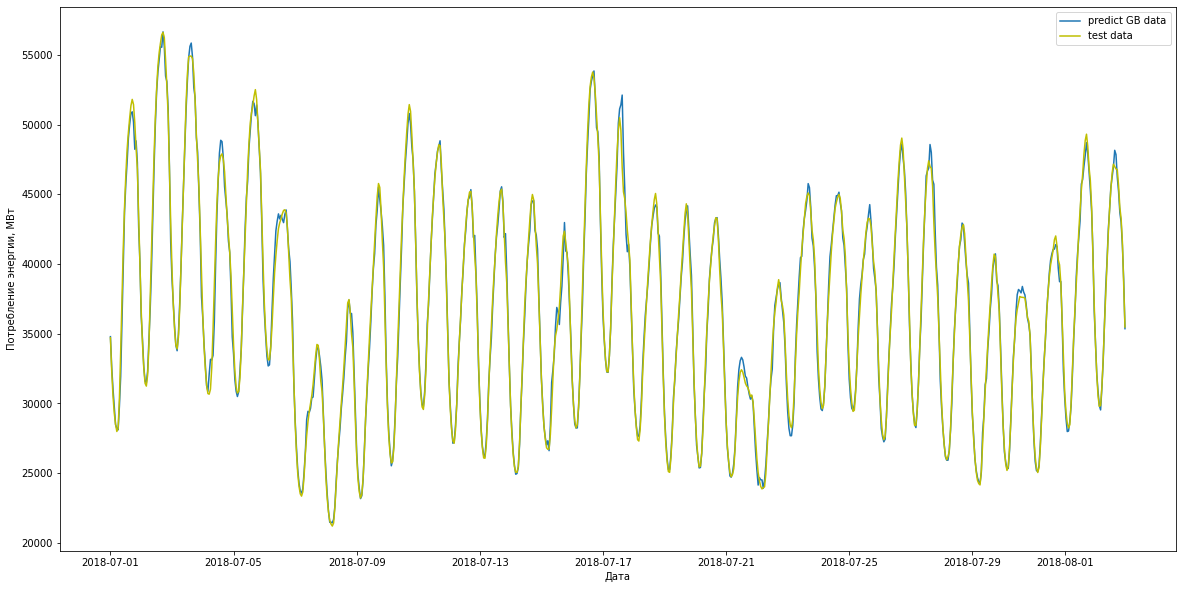

In [8]:
# Обучим модель и предскажем результат
RGB = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
RGB.fit(x_train, y_train)
y_test_pred = RGB.predict(x_test)
er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Ошибка градиентного бустинга: {er_g}%')
print(f'R2_sore: {r2}')
date_index = pd.to_datetime(x_test.index.get_level_values('Date') + ' ' + x_test.index.get_level_values('Time'))
plt.figure( figsize=(20, 10))
plt.xlabel('Дата')
plt.ylabel('Потребление энергии, МВт')
plt.plot(date_index, y_test_pred, label='predict GB data')
plt.plot(date_index, y_test, label='test data', color='y')

plt.legend()
plt.show()

In [9]:
# Поделим наши данные на тренировочные и тестовые для глубины прогноза 10
x_train, y_train, x_test, y_test = split_data_b(df, 'PJME_MW', '2018-06-30', 10)

Ошибка градиентного бустинга: 5.618227383157189%
R2_sore: 0.8755064911741637


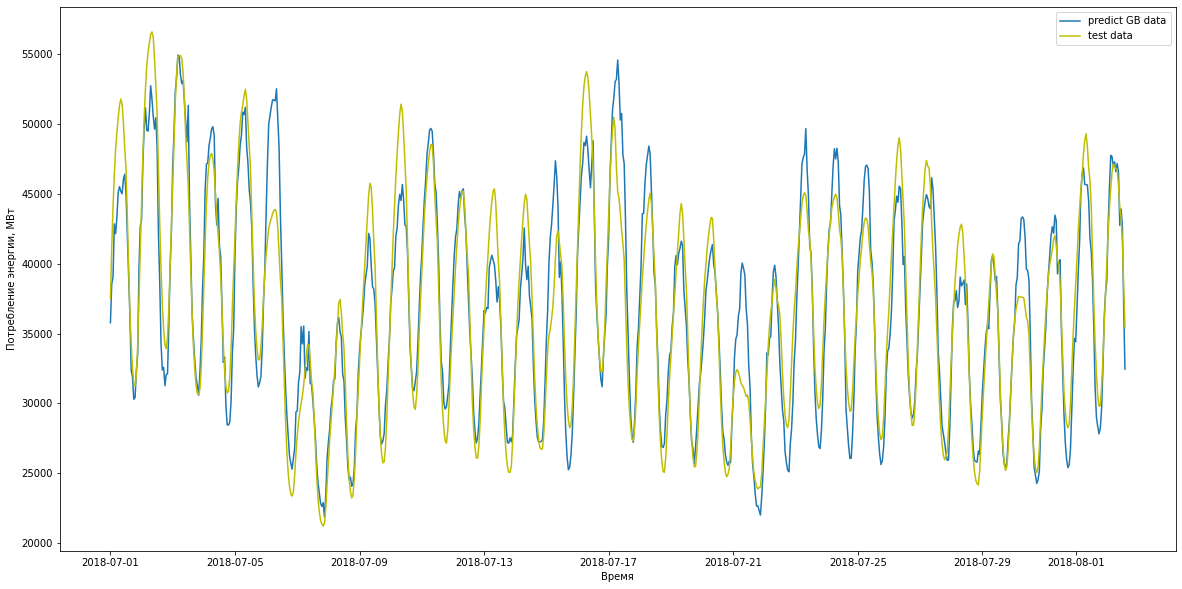

In [10]:
# Обучим модель и предскажем результат
RGB = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)
RGB.fit(x_train, y_train)
y_test_pred = RGB.predict(x_test)
er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Ошибка градиентного бустинга: {er_g}%')
print(f'R2_sore: {r2}')
date_index = pd.to_datetime(x_test.index.get_level_values('Date') + ' ' + x_test.index.get_level_values('Time'))
plt.figure( figsize=(20, 10))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(date_index, y_test_pred, label='predict GB data')
plt.plot(date_index, y_test, label='test data', color='y')

plt.legend()
plt.show()

    3. Сделайте вывод о том, как изменилась ошибка модели по значениям h.

С увеличением горизонта прогоноза ошибка модели возрастает, это связано с тем, что более отдаленные значения в меньшей степени зависят от текущих.

   4. Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

        а) Изменение температуры за окном :).

        б) Количество денег, которые тратят покупатели в интернет магазине.

        в) Вес растущего котенка.

        г) Прирост объема деревьев в лесу от времени

a - не стационарный ряд с сезонами, темпиратура меняется в зависимости от времени года и времени суток;

б - не стационарный ряд,с циклом, люди делают покупки по мере необходимости, некоторые вещи которые нужны постоянно, а некторые по мере возникновения необходимости;

в - не стационарный ряд с трендом на увеличение, вес котенка увеличивается, ведь котенок растет;

г - не стационарный ряд с циклом, когда лес очень редкий количество деревьев в нем растет, после достежения определенного количества рост прекращается, после того как старые деревья погибают количество деревьев сокращается и опять начинается рост.

    5. Какие из рядов на картинке стационарны на первый взгляд? (презентация, слайд номер 21)

b и c.